## Modelisation with UNET Mini

In [1]:
import sys  
sys.path.insert(0, './scripts')

# Import librairies, configs, helper functions
from helpers import *

config = base_config_resized

# config["use_saved_model_path"] = "./model_v4_full_cat_8.h5"
config["val_sample_nb"] = 100
config["train_sample_nb"] = 400
config["epoch"] = 12

n = NotebookProcessor(config)

{
    "width": 256,
    "height": 128,
    "classes": 8,
    "epoch": 12,
    "batch_size": 3,
    "learning_rate": 0.001,
    "train_sample_nb": 400,
    "val_sample_nb": 100,
    "use_saved_model_path": "",
    "gtFine_path": "./data/P8_Cityscapes_gtFine_trainvaltest.zip",
    "leftImg8bit_path": "./data/P8_Cityscapes_leftImg8bit_trainvaltest.zip",
    "data_path": "./data/gtFine"
} 

Dataset already exist, skip downloading: ./data/P8_Cityscapes_gtFine_trainvaltest.zip
Dataset already exist, skip downloading: ./data/P8_Cityscapes_leftImg8bit_trainvaltest.zip

- Sampling the training dataset from 2975 to 400.

- Sampling the validation dataset from 500 to 100.


2024-02-27 22:43:21.373574: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-02-27 22:43:21.373594: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2024-02-27 22:43:21.373599: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2024-02-27 22:43:21.373633: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-27 22:43:21.373651: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


First labels: (128, 256, 8)
[[[1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]]

 [[1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]]

 [[1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]]

 ...

 [[1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]]

 [[1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]]

 [[1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]]]


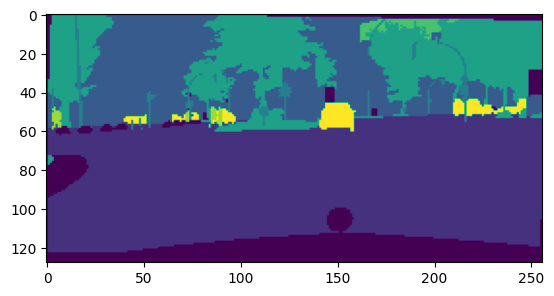

In [2]:
for features, labels in n.tf_ds["train"].take(1):  
    first_features, first_labels = features.numpy(), labels.numpy()
    print("First labels:", first_labels[0].shape)  
    print(first_labels[0])
    
    mask = tf.argmax(first_labels[0], axis=-1)
    plt.imshow(mask)


(128, 256, 8)
[[[1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]]

 [[1 0 0 ... 0 0 0]
  [0 0 1 ... 0 0 0]
  [0 0 1 ... 0 0 0]
  ...
  [0 0 1 ... 0 0 0]
  [0 0 1 ... 0 0 0]
  [0 0 1 ... 0 0 0]]

 [[1 0 0 ... 0 0 0]
  [0 0 1 ... 0 0 0]
  [0 0 1 ... 0 0 0]
  ...
  [0 0 1 ... 0 0 0]
  [0 0 1 ... 0 0 0]
  [0 0 1 ... 0 0 0]]

 ...

 [[1 0 0 ... 0 0 0]
  [0 1 0 ... 0 0 0]
  [0 1 0 ... 0 0 0]
  ...
  [0 1 0 ... 0 0 0]
  [0 1 0 ... 0 0 0]
  [0 1 0 ... 0 0 0]]

 [[1 0 0 ... 0 0 0]
  [0 1 0 ... 0 0 0]
  [0 1 0 ... 0 0 0]
  ...
  [0 1 0 ... 0 0 0]
  [0 1 0 ... 0 0 0]
  [0 1 0 ... 0 0 0]]

 [[1 0 0 ... 0 0 0]
  [0 1 0 ... 0 0 0]
  [0 1 0 ... 0 0 0]
  ...
  [0 1 0 ... 0 0 0]
  [0 1 0 ... 0 0 0]
  [0 1 0 ... 0 0 0]]]


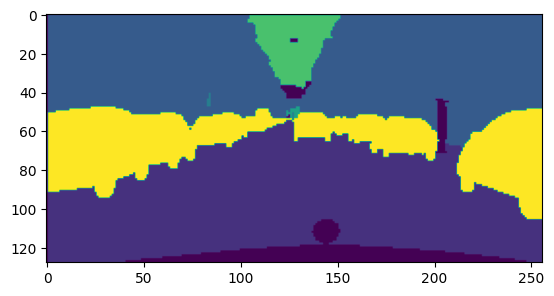

In [3]:
first_batch_images, first_batch_masks = next(iter(n.train_generator))
print(first_batch_masks[0].shape)
print(first_batch_masks[0])


mask = tf.argmax(first_batch_masks[0], axis=-1)
plt.imshow(mask)


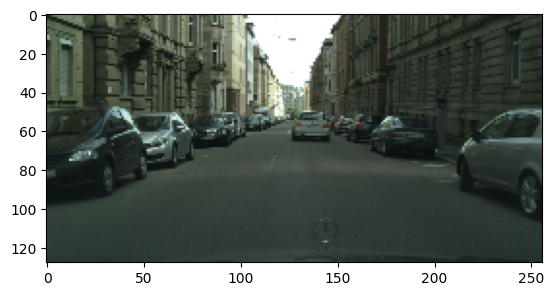

In [4]:
plt.imshow(first_batch_images[0])  

## Model definition

UNET is lorem ipsum

## Model creation

In [5]:

def conv_block(input_tensor, num_filters, dropout_rate=0.1):  
    x = Conv2D(num_filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(input_tensor)  
    x = BatchNormalization()(x)  # Adding batch normalization  
    x = Dropout(dropout_rate)(x)  
    x = Conv2D(num_filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)  
    x = BatchNormalization()(x)  # Adding batch normalization  
    return x  
  
def create_model(n_classes, img_width, img_height, img_channels):  
    inputs = Input((img_height, img_width, img_channels))  
  
    # Contraction path  
    c1 = conv_block(inputs, 16)  # Starting with fewer filters  
    p1 = MaxPooling2D((2, 2))(c1)  
      
    c2 = conv_block(p1, 32)  
    p2 = MaxPooling2D((2, 2))(c2)  
  
    c3 = conv_block(p2, 64)  # For mini U-Net, this could be considered as the bottleneck  
  
    # Expansive path   
    u4 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c3)  
    u4 = concatenate([u4, c2])  
    c4 = conv_block(u4, 32)  
       
    u5 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c4)  
    u5 = concatenate([u5, c1])  
    c5 = conv_block(u5, 16)  
       
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c5)  
       
    model = Model(inputs=[inputs], outputs=[outputs])  
    return model  

In [6]:

# # Assuming n.tf_ds["train"] gives you a dataset structured as mentioned  
# for images, masks in n.tf_ds["train"].take(10):  # Looping through the first 3 batches    
#     first_image = images[0]  # The first image  
#     first_mask = masks[0]  # The first mask  
  
#     # each pixel value represents its class  
#     mask_single_channel = np.argmax(first_mask, axis=-1)  
  
#     # Show the images  
#     fig, ax = plt.subplots(1, 2, figsize=(12, 3))  
#     ax[0].imshow(first_image)  
#     ax[0].set_title('Image')  
#     ax[0].axis('off')  
  
#     ax[1].imshow(mask_single_channel)  
#     ax[1].set_title('Mask - Colored by Class')  
#     ax[1].axis('off')  
  
#     plt.show()  

## Model Stats

In [7]:
model = create_model(n_classes=config["classes"], img_width=config["width"], img_height=config["height"], img_channels=3)
n.set_model(model)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 256, 16)         64        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 dropout (Dropout)           (None, 128, 256, 16)         0         ['batch_normalization[0][0

In [8]:
n.model_fit()


Train steps: 133
Balidation steps: 33

---------------------




KeyboardInterrupt: 

In [ ]:
# n.model_save("model_delete.keras")

In [ ]:
# display_loss_accuracy_dice_iou(n.model_fit_history)

1/1 [==============================] - 0s 157ms/step
Instructions for updating:
Use tf.identity with explicit device placement instead.


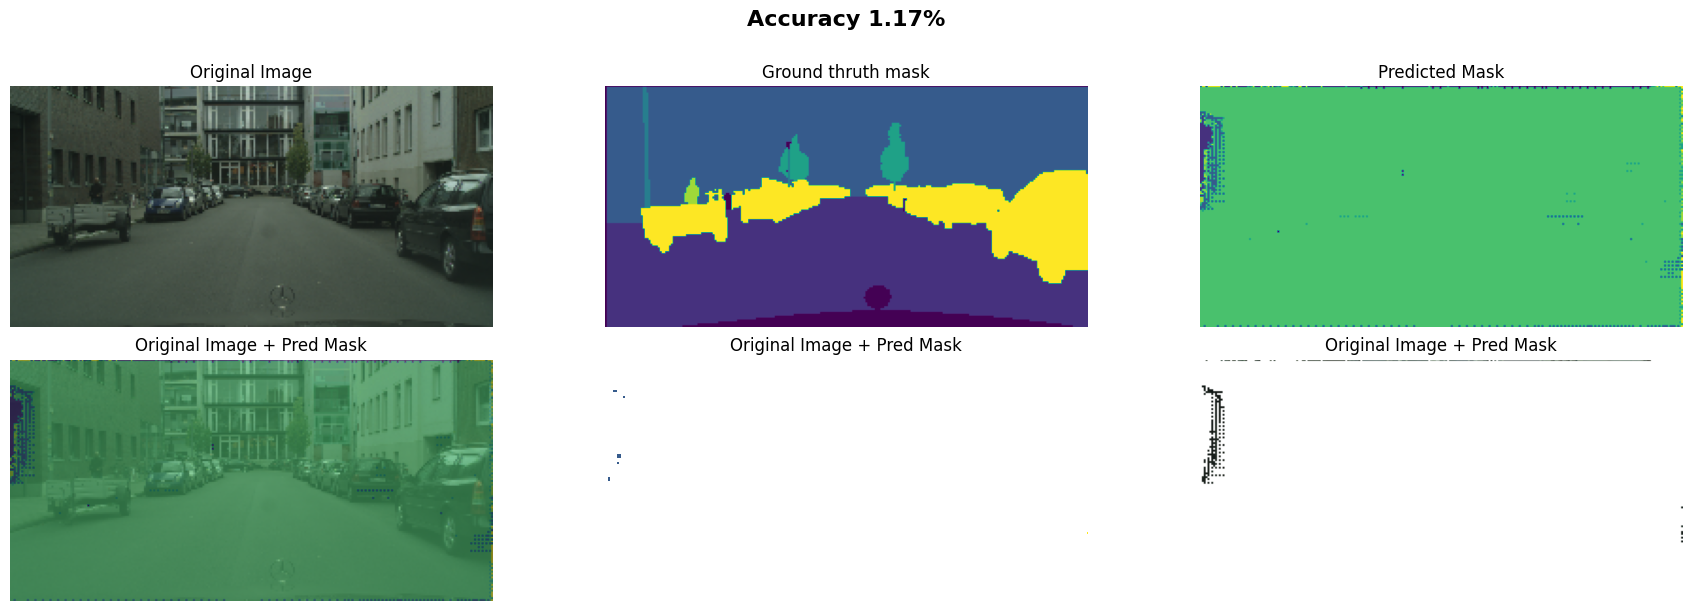

In [ ]:
n.model_predict_with_display_and_accuracy(n.img["val"][3],n.mask["val"][3])

## Model Inference

1/1 [==============================] - 0s 36ms/step
AA (128, 256, 3)
BB (128, 256, 3)


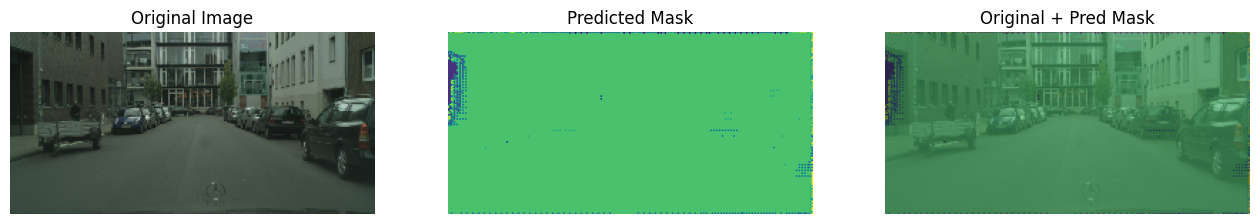

In [ ]:
n.model_predict_with_display(n.img["val"][3])